<a href="https://colab.research.google.com/github/eunhobang/Presonal-Project/blob/main/100_%EC%A0%95%ED%99%95%EB%8F%84%EC%9D%98_ML%EC%9D%84_%EC%82%AC%EC%9A%A9%ED%95%9C_%EB%87%8C%EC%A2%85%EC%96%91_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/code/summerakousar/brain-tumor-prediction-using-ml-with-100-accuracy/notebook


뇌종양은 뇌의 비정상적인 세포의 성장이다. 뇌의 해부학은 매우 복잡하며, 다른 부분들이 다른 신경계를 담당한다. 뇌종양은 보호막, 뇌 밑바닥, 뇌간, 부비강, 비강, 기타 많은 부분을 포함하여 뇌 또는 두개골의 모든 부분에서 발생할 수 있다.

뇌종양은 암(악성) 또는 비암(양성)일 수 있다.양성종양이나 악성종양이 커지면 두개골 내부의 압력이 높아진다. 이것은 뇌 손상을 일으킬 수 있고 생명을 위협할 수 있다.

그러나 뇌종양의 조기 발견 및 분류는 의료 영상 분야에서 중요한 연구 영역이며, 이에 따라 환자 생명을 구하기 위해 가장 편리한 치료 방법을 선택하는 데 도움이 된다.

라이브러리 import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

데이터셋 가져오기

In [4]:
df = pd.read_csv('./data.csv')

In [5]:
df.head()

,Unnamed: 0,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,...,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,y
0,0,70,-81,25,10,22,113,36,163,9,...,75,5,68,138,53,-4,123,2,19,tumor
1,1,108,-30,-7,60,0,24,8,113,-3,...,186,6,60,93,140,-3,271,-1,-51,tumor
2,2,75,-1,5,48,6,34,27,35,-1,...,186,225,94,62,39,-14,127,7,192,tumor
3,3,871,4,14,78,-6,85,65,227,19,...,77,6,78,30,87,-4,59,3,367,tumor
4,4,-92,-34,14,19,11,-6,27,-8,9,...,87,303,204,81,105,9,265,-2,126,tumor


In [6]:
df.tail()

,Unnamed: 0,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,...,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2,y
31,31,488,564,-29,1303,-9,1236,265,2203,41,...,16,0,109,21,6,-15,11,7,-145,Normal
32,32,164,330,-13,721,12,504,154,1381,78,...,-18,1,-1484,-4,-1,-1,3,-5,-63,Normal
33,33,1282,116,-4,542,0,1070,344,1903,42,...,5,3,128,25,2,0,7,3,-69,Normal
34,34,68,718,-50,1816,-28,251,38,598,73,...,47,-2,190,3,0,8,21,22,-214,Normal
35,35,928,332,4,412,0,681,267,1132,357,...,9,1,67,19,10,1,32,-5,72,Normal


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Columns: 7466 entries, Unnamed: 0 to y
dtypes: int64(7465), object(1)
memory usage: 2.1+ MB


In [8]:
df.isnull().sum()

Unnamed: 0    0
X53416        0
M83670        0
X90908        0
M97496        0
             ..
M13699.1      0
X54489        0
T55008        0
M10065.2      0
y             0
Length: 7466, dtype: int64

Unnamed 컬럼 지우기

In [9]:
df.drop(columns=['Unnamed: 0'], axis=1,inplace=True)
# inplace=True 따로 변수에 저장하지 않아도 완전히 삭제

In [10]:
df.columns

Index(['X53416', 'M83670', 'X90908', 'M97496', 'X90908.1', 'U37019', 'R48602',
       'T96548', 'X64559', 'T55741',
       ...
       'H87456', 'R64130', 'H11125.1', 'U22055', 'L22524', 'M13699.1',
       'X54489', 'T55008', 'M10065.2', 'y'],
      dtype='object', length=7465)

데이터 고유값 확인

In [12]:
df['y'].unique()

array(['tumor', 'Normal'], dtype=object)

데이터 통계 정보

In [14]:
df.describe()

,X53416,M83670,X90908,M97496,X90908.1,U37019,R48602,T96548,X64559,T55741,...,D14657,H87456,R64130,H11125.1,U22055,L22524,M13699.1,X54489,T55008,M10065.2
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,...,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,378.750000,177.305556,128.027778,568.305556,93.555556,366.833333,140.166667,644.194444,73.444444,68.055556,...,31.750000,71.111111,35.694444,53.194444,38.388889,40.944444,41.222222,57.027778,58.694444,44.027778
std,648.716067,243.494655,787.935802,637.451928,557.527370,427.166645,171.443202,685.514231,88.504219,90.766244,...,50.036201,118.940748,127.437115,269.630628,47.619490,83.763935,251.147778,71.322001,336.030766,224.891782
min,-694.000000,-117.000000,-50.000000,8.000000,-54.000000,-6.000000,-18.000000,-8.000000,-8.000000,-14.000000,...,-21.000000,-24.000000,-12.000000,-1484.000000,-73.000000,-16.000000,-23.000000,-5.000000,-17.000000,-214.000000
25%,-95.750000,-31.000000,-13.250000,47.250000,-7.000000,27.250000,17.750000,33.250000,8.250000,-0.250000,...,1.500000,9.000000,-1.250000,59.250000,12.750000,3.500000,-4.750000,7.000000,-5.000000,-72.750000
50%,194.500000,117.000000,-4.500000,293.500000,3.000000,110.500000,37.500000,333.500000,37.500000,23.500000,...,10.000000,55.500000,3.000000,94.000000,36.000000,7.000000,0.000000,20.000000,1.500000,-12.000000
75%,721.750000,330.500000,14.000000,1079.250000,10.250000,675.000000,268.500000,1185.250000,107.750000,109.250000,...,48.000000,78.750000,6.000000,121.250000,64.000000,39.500000,6.500000,98.250000,7.000000,74.250000
max,1815.000000,718.000000,4723.000000,2261.000000,3344.000000,1354.000000,718.000000,2203.000000,357.000000,357.000000,...,156.000000,686.000000,686.000000,251.000000,138.000000,444.000000,1505.000000,271.000000,2018.000000,1089.000000


In [16]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
'''
df.iloc[행, 열] - 둘 다 행은 모두 가져옴
X - 첫 번째 열부터 마지막 것 빼고 다 가져오기
y - 맨 마지막 열만 가져오기
'''

'\ndf.iloc[행, 열] - 둘 다 행은 모두 가져옴\nX - 첫 번째 열부터 마지막 것 빼고 다 가져오기\ny - 맨 마지막 열만 가져오기\n'

Label Encoding: 데이터 값 0,1로 바꾸기

In [17]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])

In [18]:
df['y'].unique()

array([1, 0])

학습, 테스트 데이터 나누기

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=42)

Training Data

In [20]:
X_train

array([[-378,   31,  -29, ...,   97,    0,  -51],
       [  71, -117,   -1, ...,  114,    1, 1089],
       [ 475,  -79,   20, ...,   76,   11,   22],
       ...,
       [-346,  -35,   37, ...,   30,   -5,  -53],
       [-357,    6,   20, ...,   52,   -1,  -72],
       [1122,  416,   -7, ...,   16,  -17,  -10]])

In [21]:
y_train

array(['tumor', 'tumor', 'tumor', 'Normal', 'tumor', 'tumor', 'Normal',
       'tumor', 'Normal', 'tumor', 'tumor', 'tumor', 'Normal', 'tumor',
       'Normal', 'tumor', 'Normal', 'Normal', 'Normal', 'tumor', 'Normal',
       'Normal', 'Normal', 'tumor', 'Normal', 'tumor', 'tumor', 'Normal'],
      dtype=object)

Testing Data

In [23]:
X_test

array([[ 928,  332,    4, ...,   32,   -5,   72],
       [-694,  -45,  -34, ...,  179,   -1, -139],
       [ 632,  185, 4723, ...,    3,   -4, -103],
       ...,
       [ 488,  564,  -29, ...,   11,    7, -145],
       [ 462,  379,  -21, ...,   10,   -5,   66],
       [ 465, -104,    5, ...,  131,   -5,  267]])

In [24]:
y_test

array(['Normal', 'tumor', 'Normal', 'Normal', 'tumor', 'Normal', 'Normal',
       'tumor'], dtype=object)

데이터 변환

In [25]:
from sklearn.preprocessing import StandardScaler # ~1로 데이터 변환(데이터 범주변환)
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [26]:
X_train

array([[-1.16152576, -0.57125   , -1.45171125, ...,  0.55857091,
        -0.40427083, -0.40206435],
       [-0.44373664, -1.17715222,  0.04387564, ...,  0.79282619,
        -0.30834216,  4.49823886],
       [ 0.2021137 , -1.02158273,  1.1655658 , ...,  0.26919673,
         0.65094455, -0.08827301],
       ...,
       [-1.11036929, -0.84144964,  2.0736007 , ..., -0.36467052,
        -0.88391419, -0.41066137],
       [-1.12795433, -0.67359835,  1.1655658 , ..., -0.06151662,
        -0.5001995 , -0.4923331 ],
       [ 1.23643344,  1.00491457, -0.27660727, ..., -0.55758664,
        -2.03505824, -0.22582538]])

X_trian, y_train Shape

In [27]:
print(X_train.shape)
print(y_train.shape)

(28, 7464)
(28,)


### ML(classification)
- Logistic Regression
  - 회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0에서 1 사이의 값으로 예측하고 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘이다.
- kNN(KNearest Neighbors)
- Random Forest Flssifier
- Decision Tree Classifier

### Logistic Regression

In [32]:
# 모델 빌드
from sklearn.linear_model import LogisticRegression
# 학습
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [34]:
# 예측
y_predict = log_reg.predict(X_test)
y_predict

array(['Normal', 'tumor', 'Normal', 'Normal', 'tumor', 'Normal', 'Normal',
       'tumor'], dtype=object)

In [36]:
# 정확도
score = log_reg.score(X_test, y_test)
print(score)

1.0


In [38]:
# 오차행렬
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_predict) 
cnf_matrix

array([[5, 0],
       [0, 3]])

In [40]:
# 평가지표
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00         5
       tumor       1.00      1.00      1.00         3

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



Score :  1.0


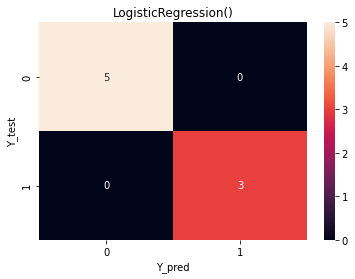

In [41]:
# 로지스틱 회귀분석의 오차행렬도
from sklearn.metrics import confusion_matrix
pred_list = [log_reg]

for i in pred_list:
  print("Score : ", i.score(X_test,y_test))
  y_pred = i.predict(X_test)
  sns.heatmap(confusion_matrix(y_test,y_pred), annot=True)
  
  plt.xlabel("Y_pred")
  plt.ylabel("Y_test")
  plt.title(i)
  plt.show()